In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# This lab is a continuation of the previous lab. So to see the solutions of this lab please scroll down.

**1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv**

**2. Find all of the categorical data. Save it in a categorical_df variable.**

In [4]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#Define a function that will rename columns to PE8 style

def rename_columns(df):
    df2 = df.copy()#making a copy just to be safe
    df2.columns = df.columns.str.replace(" ", "_")
    df2 = df2.rename(columns=str.lower)
    return df2

In [7]:
customer_df = rename_columns(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
#change the column effective_to_date to daetime format
customer_df['effective_to_date'] =  pd.to_datetime(customer_df['effective_to_date'])

In [9]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [10]:
customer_df['months_since_last_claim'].dtypes

dtype('int64')

In [11]:
#This function seperates the continuous and discrete variables
def count_disc_splitter(df):
    continuous_list = []
    discrete_list = []
    for col in df:
        if df[col].nunique() > 35 and df[col].dtypes != 'O':#with this condition of != 'O', I am getting rid of customer column
            continuous_list.append(col)
            continuous = df[continuous_list]
        elif df[col].nunique() <= 60:
            discrete_list.append(col)
            discrete = df[discrete_list]
        else:
            pass
    return continuous, discrete

In [12]:
numerical_df , categorical_df = count_disc_splitter(customer_df)

In [13]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [14]:
numerical_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879


**3.Check for NaN values.**

In [15]:
categorical_df.isna().sum()

state                        0
response                     0
coverage                     0
education                    0
employmentstatus             0
gender                       0
location_code                0
marital_status               0
number_of_open_complaints    0
number_of_policies           0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
vehicle_class                0
vehicle_size                 0
dtype: int64

In [16]:
categorical_df.isnull().sum()

state                        0
response                     0
coverage                     0
education                    0
employmentstatus             0
gender                       0
location_code                0
marital_status               0
number_of_open_complaints    0
number_of_policies           0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
vehicle_class                0
vehicle_size                 0
dtype: int64

There are no null values!

**4.Check all unique values of columns.**

In [17]:
print(categorical_df.apply(lambda col: col.unique()))

state                        [Washington, Arizona, Nevada, California, Oregon]
response                                                             [No, Yes]
coverage                                            [Basic, Extended, Premium]
education                    [Bachelor, College, Master, High School or Bel...
employmentstatus             [Employed, Unemployed, Medical Leave, Disabled...
gender                                                                  [F, M]
location_code                                         [Suburban, Rural, Urban]
marital_status                                     [Married, Single, Divorced]
number_of_open_complaints                                   [0, 2, 1, 3, 5, 4]
number_of_policies                                 [1, 8, 2, 7, 9, 4, 3, 6, 5]
policy_type                      [Corporate Auto, Personal Auto, Special Auto]
policy                       [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                              [Offer

In [18]:
print(categorical_df.apply(lambda col: col.nunique()))

state                        5
response                     2
coverage                     3
education                    5
employmentstatus             5
gender                       2
location_code                3
marital_status               3
number_of_open_complaints    6
number_of_policies           9
policy_type                  3
policy                       9
renew_offer_type             4
sales_channel                4
vehicle_class                6
vehicle_size                 3
dtype: int64


**5.Check dtypes. Do they all make sense as categorical data?**

In [19]:
categorical_df.dtypes

state                        object
response                     object
coverage                     object
education                    object
employmentstatus             object
gender                       object
location_code                object
marital_status               object
number_of_open_complaints     int64
number_of_policies            int64
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

To me they all make sense as categorical data! Even though policy_type and policy are integers, the number of unique values that they have can resemble groups/categories, there fore they are worth treating as categoricals. 

**6.Does any column contain alpha and numeric data? Decide how to clean it.**

I think the following values **[Offer1, Offer3, Offer2, Offer4]** in the **renew_offer_type** column are alphanumeric data. Maybe one possible way to clean it is by making them just numbers. For Offer1: 1, offer2: 2......and so. This will make label encoding much easier, as this has an order and now  is categorical ordinal. 

In [20]:

categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [21]:
#replacing renew_offer_type values with numeric values as it will be easier for encoding later on
categorical_df["renew_offer_type"].replace({"Offer1": 1, "Offer2": 2, "Offer3": 3, "Offer4": 4}, inplace=True)

C:\Users\ALP\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
categorical_df['renew_offer_type'].value_counts()

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

**7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.**

Most likely I would group some values together in categorical nominal data. As we apply onehotencoding to this, it will reduce the number of columns we have, if we group certain values together. 

- JustFor example the column state could be grouped into East coast and West coast. Or from seeing the value counts, maybe the states of Arizona, Nevada and Washington can be grouped togeter as they are quite low in counts compared to California and Oregon.

- Another example is thtat employmentstatus could be Employed, Unemployed or other. 

In [23]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [24]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

**8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?**

In [25]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [26]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

They share similar information, the only difference is that policy is more specific, and policy_type is a bit more generalised. In my opinion havin the policy type is more important, as it will give us three clear groups, compared to multiple subgroups in policy column. I would drop the policy column and go for the policy type column. As it makes encoding much easier!

**9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.**

In [27]:
for col in categorical_df:
    print(categorical_df[col].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: numb

In [28]:
#Which column values would I combine:
#State, education, employmentstatus, number_of_open_complaints, number_of_policies, renew offer type, sales_channel, 
#vehicle_class

In [29]:
# State
# Grouped the smaller states together as other, this makes it more equal amongs the different states
categorical_df['state'] = list(map(lambda x: 'Other' if x in ['Arizona', 'Nevada', 'Washington'] else x, categorical_df['state']))
categorical_df['state'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Other         3383
California    3150
Oregon        2601
Name: state, dtype: int64

In [30]:
#education
#I grouped Bachelor, Master and Doctor into one called university degree (as the amount of Masters and Doctors were small)
categorical_df['education'] = list(map(lambda x: 'University Degree' if x in ['Bachelor', 'Master', 'Doctor'] else x, categorical_df['education']))
categorical_df['education'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


University Degree       3831
College                 2681
High School or Below    2622
Name: education, dtype: int64

In [31]:
#employmentstatus
#As employed is signicficantly higher, I will group all other values as other
categorical_df['employmentstatus'] = list(map(lambda x: 'Other' if x in ['Unemployed', 'Medical Leave', 'Disabled', 'Retired'] else x, categorical_df['employmentstatus']))
categorical_df['employmentstatus'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Employed    5698
Other       3436
Name: employmentstatus, dtype: int64

In [32]:
#Number of open complaints, 
#as Zero is significanly higher, I will group all the others together. THis may still not 
#help to deal with the class imbalcanc, but it doesnt make sense to do it any other way
categorical_df['number_of_open_complaints'] = list(map(lambda x: 'At least 1' if x in [1,2,3,4,5] else x, categorical_df['number_of_open_complaints']))
categorical_df['number_of_open_complaints'] = list(map(lambda x: 'None' if x in [0] else x, categorical_df['number_of_open_complaints']))
categorical_df['number_of_open_complaints'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


None          7252
At least 1    1882
Name: number_of_open_complaints, dtype: int64

In [33]:
#number_of_policies
#I will group 3 or more policies together, and then go from there
categorical_df['number_of_policies'] = list(map(lambda x: '3 or more' if x in [3,4,5,6,7,8,9] else x, categorical_df['number_of_policies']))
categorical_df['number_of_policies'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3 or more    3589
1            3251
2            2294
Name: number_of_policies, dtype: int64

In [34]:
#renew offer type
# I have grouped 3 and 4 together as other
categorical_df['renew_offer_type'] = list(map(lambda x: 'other' if x in [3,4] else x, categorical_df['renew_offer_type']))
categorical_df['renew_offer_type'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1        3752
2        2926
other    2456
Name: renew_offer_type, dtype: int64

In [35]:
#sales_channel
#Here it makes more sense to group call center and Web together and call it other media, as they are small in count
categorical_df['sales_channel'] = list(map(lambda x: 'Other Media' if x in ['Call Center','Web'] else x, categorical_df['sales_channel']))
categorical_df['sales_channel'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Agent          3477
Other Media    3090
Branch         2567
Name: sales_channel, dtype: int64

In [36]:
# vehicle_class
#As 4 door car is significantly higher in count, perhaps it makes sense to group all the others together as other to make it comparable
#categorical_df['sales_channel'].value_counts()
#categorical_df['vehicle_class'] = list(map(lambda x: 'Other Media' if x in ['Call Center','Web'] else x, categorical_df['vehicle_class']))
categorical_df['vehicle_class'] = list(map(lambda x: 'Other' if x in ['Two-Door Car','SUV', 'Sports Car','Luxury SUV','Luxury Car'] else x, categorical_df['vehicle_class']))
categorical_df['vehicle_class'].value_counts()

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Four-Door Car    4621
Other            4513
Name: vehicle_class, dtype: int64

# Lab | Feature extraction

Instructions
Open the categoricals variable we created before.


categoricals = data.select_dtypes(np.object)
categoricals.head()

Plot all the categorical variables with the proper plot. What can you see?

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Plot time variable. Can you extract something from it?

In [37]:
def plot_categorical(df):
    for column in df:
        plt.figure()
        plt.title(column)
        df[column].value_counts().plot(kind = 'bar')

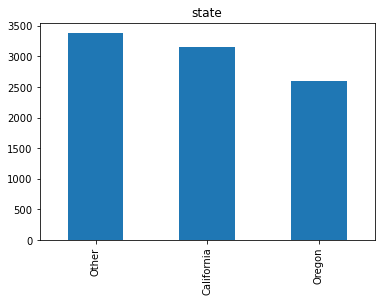

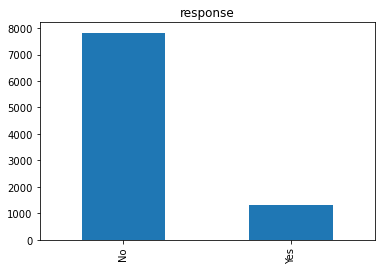

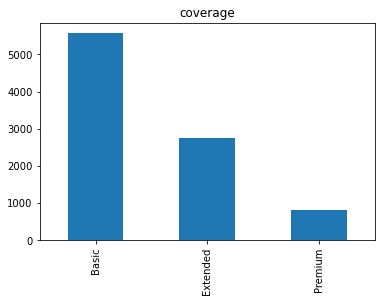

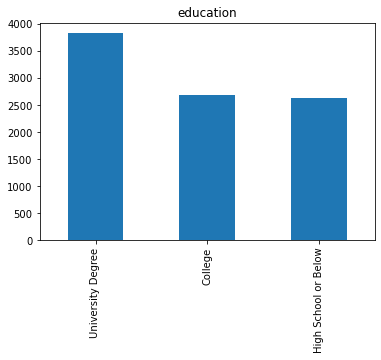

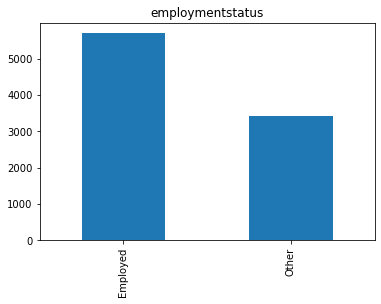

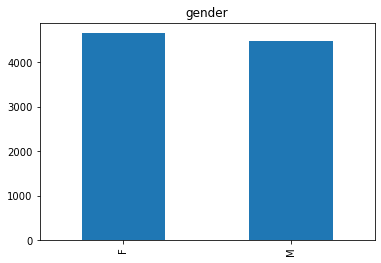

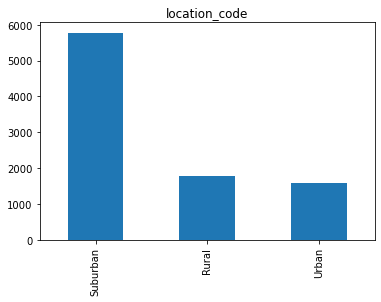

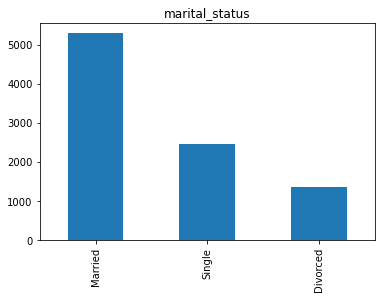

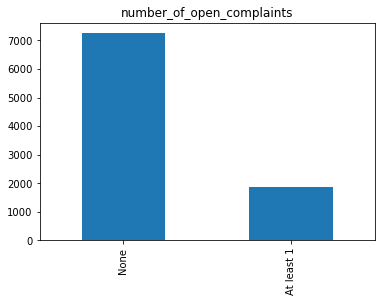

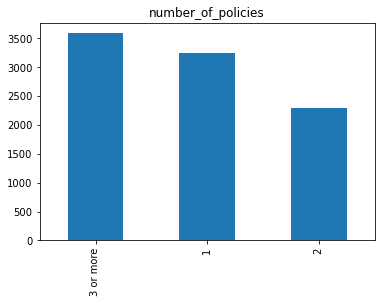

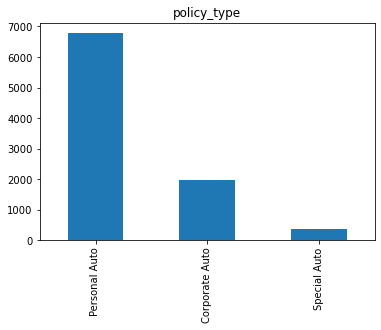

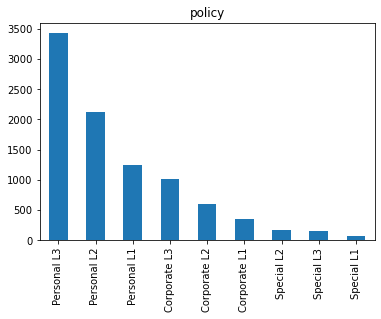

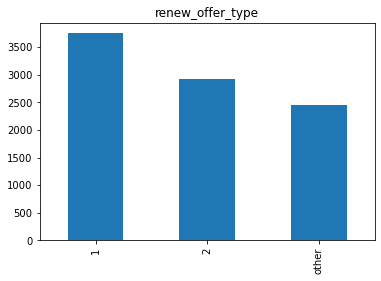

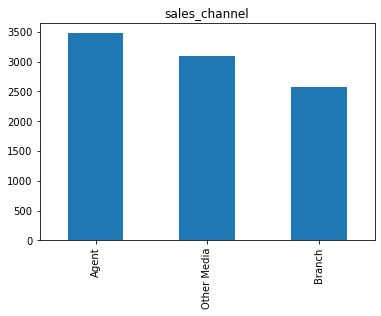

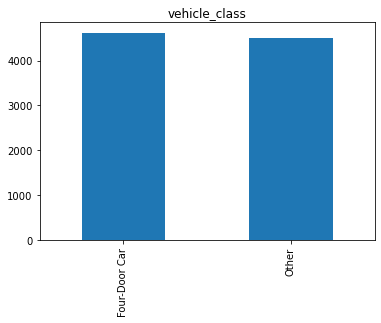

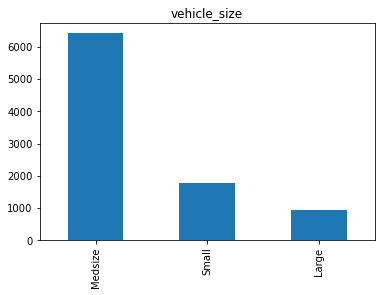

In [38]:
plot_categorical(categorical_df)

- It appears that there are still columns, with significance class imbalance, for example the response, coverage, location code


- For me the redundant columns are: **policy** as policy_type can be kept instead, they basically have the same information but policy is just way more specific, and for the sake of encoding we dont need it to be too specific.
  

In [39]:
#Lets remove the following columns 'policy' as mentioned in previous
#comments
categorical_df.drop(columns=['policy'], inplace=True)

C:\Users\ALP\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Other,No,Basic,University Degree,Employed,F,Suburban,Married,None,1,Corporate Auto,1,Agent,Other,Medsize
1,Other,No,Extended,University Degree,Other,F,Suburban,Single,None,3 or more,Personal Auto,other,Agent,Four-Door Car,Medsize
2,Other,No,Premium,University Degree,Employed,F,Suburban,Married,None,2,Personal Auto,1,Agent,Other,Medsize
3,California,No,Basic,University Degree,Other,M,Suburban,Married,None,3 or more,Corporate Auto,1,Other Media,Other,Medsize
4,Other,No,Basic,University Degree,Employed,M,Rural,Single,None,1,Personal Auto,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,University Degree,Employed,M,Urban,Married,None,2,Personal Auto,2,Other Media,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,None,1,Corporate Auto,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,University Degree,Other,M,Suburban,Single,At least 1,2,Corporate Auto,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,None,3 or more,Personal Auto,other,Branch,Four-Door Car,Large


<AxesSubplot:title={'center':'Effective to date'}>

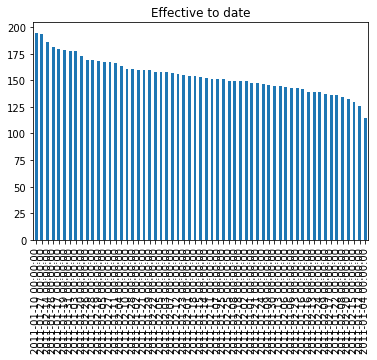

In [42]:
#Plot time variable. Can you extract something from it?
plt.figure()
plt.title('Effective to date')
numerical_df['effective_to_date'].value_counts().plot(kind = 'bar')

From this I can see that all the dates are almost equally spread out in the counts, but not quite. I have kept it the way it is, as I may want to label/ordinal encode the column. 

The other argument is that there are just way too many date values, and i wouldnt make sense to include it into any model. So for this reason I could also choose to drop date. But it all depends on how the model performs with or without it. 